# Consciencia Jerarquica: Celulas → Clusters → Organismo

Este notebook explora el sistema de **consciencia jerarquica** donde la consciencia emerge de multiples niveles de organizacion.

## Arquitectura Multi-Nivel

```
    ORGANISMO (consciencia global)
         ↑↓
    CLUSTERS (consciencia local)
         ↑↓
    CELULAS (micro-psiques individuales)
```

## Contenido
1. Micro-psiques celulares
2. Agregacion en clusters
3. Consciencia del organismo
4. Integracion bottom-up
5. Modulacion top-down
6. Clustering dinamico
7. Coherencia vertical

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyBboxPatch, ConnectionPatch
from matplotlib.collections import PatchCollection
import matplotlib.gridspec as gridspec
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
from enum import Enum
import warnings
warnings.filterwarnings('ignore')

# Configuracion visual
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Colores
COLORS = {
    'cell': '#4ECDC4',
    'cluster': '#9B59B6',
    'organism': '#FFD700',
    'PERSONA': '#FF6B6B',
    'SOMBRA': '#9B59B6',
    'ANIMA': '#3498DB',
    'ANIMUS': '#E67E22',
}

class Archetype(Enum):
    PERSONA = 0
    SOMBRA = 1
    ANIMA = 2
    ANIMUS = 3

## 1. Micro-Psiques Celulares

Cada celula tiene su propia **micro-psique** con distribucion de arquetipos:

$$\vec{a}_i = (p_i, s_i, a_i^{anima}, a_i^{animus}) \quad \text{donde} \quad \sum = 1$$

In [2]:
@dataclass
class MicroPsyche:
    """Psique a nivel celular."""
    archetypes: np.ndarray  # [persona, sombra, anima, animus]
    position: Tuple[float, float] = (0.0, 0.0)
    energy: float = 1.0
    plasticity: float = 1.0  # Receptividad al cambio
    
    def __post_init__(self):
        # Normalizar
        self.archetypes = np.array(self.archetypes, dtype=float)
        self.archetypes = self.archetypes / self.archetypes.sum()
    
    @property
    def dominant(self) -> Archetype:
        return Archetype(np.argmax(self.archetypes))
    
    @property
    def entropy(self) -> float:
        """Entropia de la distribucion (mayor = mas uniforme)."""
        p = self.archetypes + 1e-10
        return -np.sum(p * np.log(p))
    
    def apply_modulation(self, target: np.ndarray, strength: float):
        """Aplica modulacion top-down."""
        delta = target - self.archetypes
        self.archetypes += delta * strength * self.plasticity
        self.archetypes = np.clip(self.archetypes, 0.01, None)
        self.archetypes /= self.archetypes.sum()

def create_random_cell(x: float, y: float, bias: Optional[Archetype] = None) -> MicroPsyche:
    """Crea una celula con distribucion aleatoria o sesgada."""
    if bias is not None:
        archetypes = np.random.dirichlet([1, 1, 1, 1])
        archetypes[bias.value] += np.random.uniform(0.2, 0.5)
        archetypes /= archetypes.sum()
    else:
        archetypes = np.random.dirichlet([1, 1, 1, 1])
    
    return MicroPsyche(
        archetypes=archetypes,
        position=(x, y),
        energy=np.random.uniform(0.7, 1.0),
        plasticity=np.random.uniform(0.5, 1.5)
    )

In [3]:
# Crear una poblacion de celulas
np.random.seed(42)
n_cells = 64
grid_size = 8

cells: List[MicroPsyche] = []

# Crear celulas con sesgo espacial (regiones dominadas por arquetipos)
for i in range(grid_size):
    for j in range(grid_size):
        x, y = i + 0.5, j + 0.5
        
        # Sesgo segun region
        if i < grid_size//2 and j < grid_size//2:
            bias = Archetype.PERSONA
        elif i >= grid_size//2 and j < grid_size//2:
            bias = Archetype.SOMBRA
        elif i < grid_size//2 and j >= grid_size//2:
            bias = Archetype.ANIMA
        else:
            bias = Archetype.ANIMUS
        
        cells.append(create_random_cell(x, y, bias))

print(f"Creadas {len(cells)} celulas")
print(f"\nDistribucion de arquetipos dominantes:")
for arch in Archetype:
    count = sum(1 for c in cells if c.dominant == arch)
    print(f"  {arch.name}: {count} celulas ({count/len(cells)*100:.1f}%)")

Creadas 64 celulas

Distribucion de arquetipos dominantes:
  PERSONA: 16 celulas (25.0%)
  SOMBRA: 14 celulas (21.9%)
  ANIMA: 18 celulas (28.1%)
  ANIMUS: 16 celulas (25.0%)


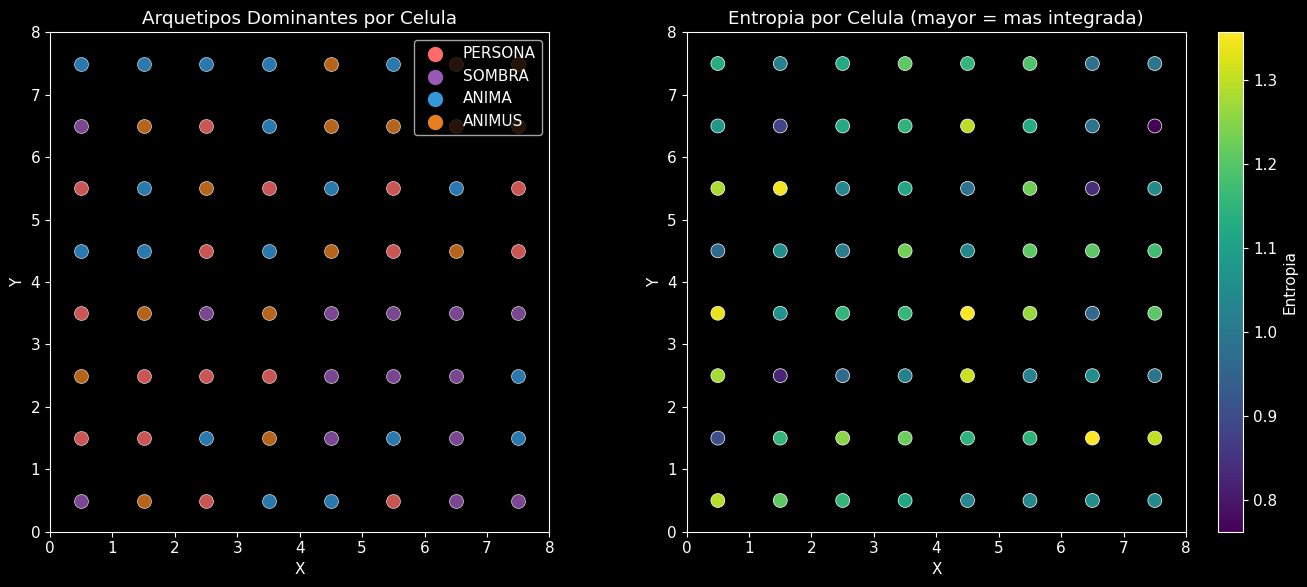

In [4]:
# Visualizar el grid de celulas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Panel izquierdo: Arquetipos dominantes
for cell in cells:
    color = COLORS[cell.dominant.name]
    ax1.scatter(cell.position[0], cell.position[1], 
                c=color, s=100, alpha=0.8, edgecolors='white', linewidth=0.5)

ax1.set_xlim(0, grid_size)
ax1.set_ylim(0, grid_size)
ax1.set_aspect('equal')
ax1.set_title('Arquetipos Dominantes por Celula')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Leyenda
for arch in Archetype:
    ax1.scatter([], [], c=COLORS[arch.name], s=100, label=arch.name)
ax1.legend(loc='upper right')

# Panel derecho: Entropia (diversidad interna)
entropies = [cell.entropy for cell in cells]
xs = [c.position[0] for c in cells]
ys = [c.position[1] for c in cells]

sc = ax2.scatter(xs, ys, c=entropies, cmap='viridis', s=100, 
                 edgecolors='white', linewidth=0.5)
ax2.set_xlim(0, grid_size)
ax2.set_ylim(0, grid_size)
ax2.set_aspect('equal')
ax2.set_title('Entropia por Celula (mayor = mas integrada)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(sc, ax=ax2, label='Entropia')

plt.tight_layout()
plt.show()

## 2. Agregacion en Clusters

Las celulas se agrupan en **clusters** que representan consciencia local:

$$\vec{a}_{cluster} = \frac{\sum_i w_i \vec{a}_i}{\sum_i w_i}$$

Donde $w_i$ es el peso de cada celula (basado en energia).

In [5]:
@dataclass
class Cluster:
    """Agrupacion de celulas con consciencia local."""
    cells: List[MicroPsyche]
    id: int
    
    @property
    def center(self) -> Tuple[float, float]:
        """Centro geometrico del cluster."""
        if not self.cells:
            return (0, 0)
        xs = [c.position[0] for c in self.cells]
        ys = [c.position[1] for c in self.cells]
        return (np.mean(xs), np.mean(ys))
    
    @property
    def aggregate_archetypes(self) -> np.ndarray:
        """Arquetipos agregados ponderados por energia."""
        if not self.cells:
            return np.array([0.25, 0.25, 0.25, 0.25])
        
        weights = np.array([c.energy for c in self.cells])
        archetypes = np.array([c.archetypes for c in self.cells])
        
        # Agregacion ponderada (sin softmax para preservar varianza)
        weighted = archetypes * weights[:, np.newaxis]
        aggregate = weighted.sum(axis=0) / weights.sum()
        
        return aggregate
    
    @property
    def coherence(self) -> float:
        """Coherencia interna del cluster (similitud entre celulas)."""
        if len(self.cells) < 2:
            return 1.0
        
        archetypes = np.array([c.archetypes for c in self.cells])
        mean_arch = archetypes.mean(axis=0)
        
        # Distancia promedio al centroide
        distances = np.linalg.norm(archetypes - mean_arch, axis=1)
        return 1.0 / (1.0 + distances.mean())
    
    @property
    def dominant(self) -> Archetype:
        return Archetype(np.argmax(self.aggregate_archetypes))

def assign_to_clusters(cells: List[MicroPsyche], n_clusters: int = 4) -> List[Cluster]:
    """Asigna celulas a clusters basado en posicion espacial."""
    # Simple grid-based clustering
    clusters = [Cluster(cells=[], id=i) for i in range(n_clusters)]
    
    grid_mid = grid_size / 2
    
    for cell in cells:
        x, y = cell.position
        if x < grid_mid and y < grid_mid:
            clusters[0].cells.append(cell)
        elif x >= grid_mid and y < grid_mid:
            clusters[1].cells.append(cell)
        elif x < grid_mid and y >= grid_mid:
            clusters[2].cells.append(cell)
        else:
            clusters[3].cells.append(cell)
    
    return clusters

In [6]:
# Crear clusters
clusters = assign_to_clusters(cells, n_clusters=4)

print("Clusters creados:")
print("=" * 60)
for cluster in clusters:
    agg = cluster.aggregate_archetypes
    print(f"\nCluster {cluster.id}:")
    print(f"  Celulas: {len(cluster.cells)}")
    print(f"  Centro: ({cluster.center[0]:.1f}, {cluster.center[1]:.1f})")
    print(f"  Dominante: {cluster.dominant.name}")
    print(f"  Arquetipos: P={agg[0]:.2f}, S={agg[1]:.2f}, Ai={agg[2]:.2f}, Au={agg[3]:.2f}")
    print(f"  Coherencia: {cluster.coherence:.3f}")

Clusters creados:

Cluster 0:
  Celulas: 16
  Centro: (2.0, 2.0)
  Dominante: PERSONA
  Arquetipos: P=0.41, S=0.21, Ai=0.16, Au=0.22
  Coherencia: 0.787

Cluster 1:
  Celulas: 16
  Centro: (6.0, 2.0)
  Dominante: SOMBRA
  Arquetipos: P=0.18, S=0.43, Ai=0.27, Au=0.12
  Coherencia: 0.810

Cluster 2:
  Celulas: 16
  Centro: (2.0, 6.0)
  Dominante: ANIMA
  Arquetipos: P=0.22, S=0.16, Ai=0.42, Au=0.20
  Coherencia: 0.783

Cluster 3:
  Celulas: 16
  Centro: (6.0, 6.0)
  Dominante: ANIMUS
  Arquetipos: P=0.28, S=0.13, Ai=0.19, Au=0.40
  Coherencia: 0.772


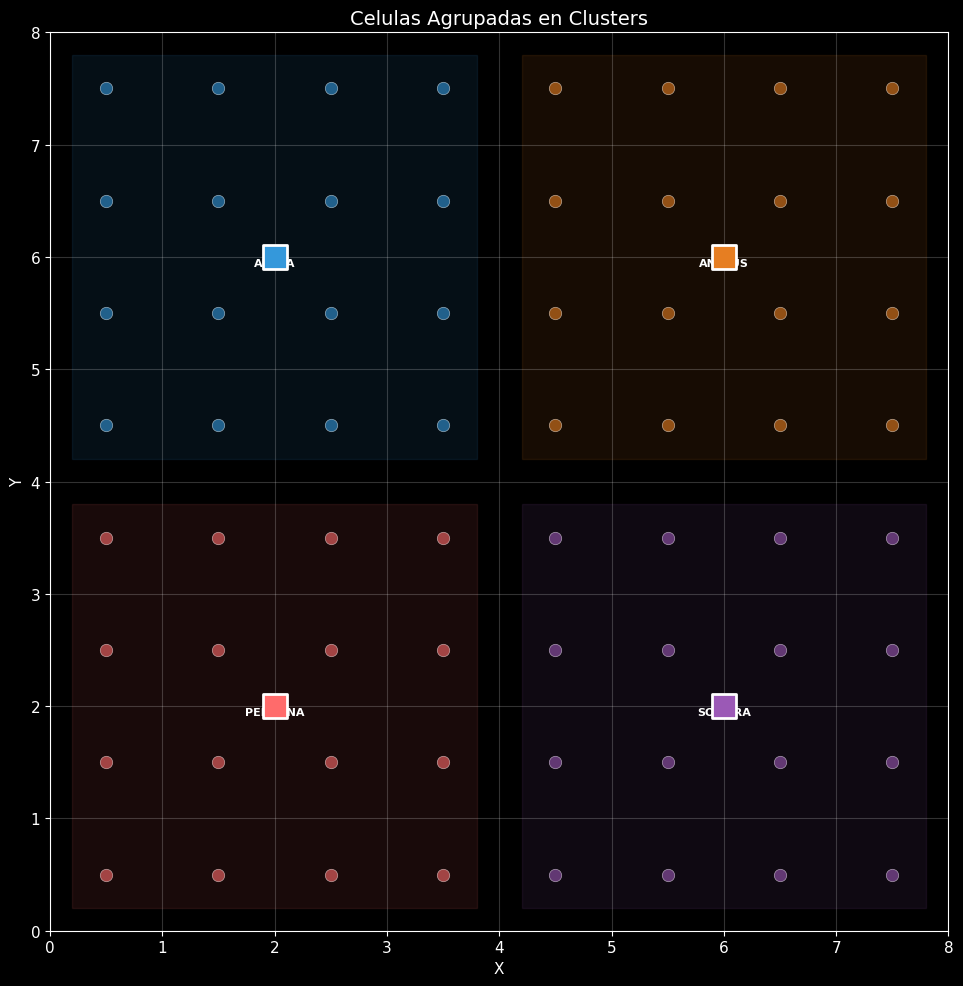

In [7]:
# Visualizar clusters
fig, ax = plt.subplots(figsize=(10, 10))

cluster_colors = ['#FF6B6B', '#9B59B6', '#3498DB', '#E67E22']

for cluster, color in zip(clusters, cluster_colors):
    # Dibujar celulas del cluster
    for cell in cluster.cells:
        ax.scatter(cell.position[0], cell.position[1],
                   c=color, s=80, alpha=0.6, edgecolors='white', linewidth=0.5)
    
    # Dibujar centro del cluster
    cx, cy = cluster.center
    ax.scatter(cx, cy, c=color, s=300, marker='s', 
               edgecolors='white', linewidth=2, zorder=5)
    ax.annotate(f'C{cluster.id}\n{cluster.dominant.name}', 
                (cx, cy), ha='center', va='center',
                fontsize=8, fontweight='bold', color='white')
    
    # Dibujar region del cluster
    if cluster.cells:
        xs = [c.position[0] for c in cluster.cells]
        ys = [c.position[1] for c in cluster.cells]
        ax.fill([min(xs)-0.3, max(xs)+0.3, max(xs)+0.3, min(xs)-0.3],
                [min(ys)-0.3, min(ys)-0.3, max(ys)+0.3, max(ys)+0.3],
                color=color, alpha=0.1)

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')
ax.set_title('Celulas Agrupadas en Clusters', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

## 3. Consciencia del Organismo

El nivel mas alto agrega la consciencia de todos los clusters:

$$\vec{a}_{organism} = \frac{\sum_j w_j \vec{a}_{cluster_j}}{\sum_j w_j}$$

In [8]:
@dataclass
class OrganismConsciousness:
    """Consciencia a nivel de organismo."""
    clusters: List[Cluster]
    
    @property
    def global_archetypes(self) -> np.ndarray:
        """Arquetipos globales del organismo."""
        if not self.clusters:
            return np.array([0.25, 0.25, 0.25, 0.25])
        
        # Pesos basados en tamano del cluster
        weights = np.array([len(c.cells) for c in self.clusters], dtype=float)
        if weights.sum() == 0:
            weights = np.ones(len(self.clusters))
        
        archetypes = np.array([c.aggregate_archetypes for c in self.clusters])
        
        weighted = archetypes * weights[:, np.newaxis]
        global_arch = weighted.sum(axis=0) / weights.sum()
        
        return global_arch
    
    @property
    def phi_global(self) -> float:
        """Integracion global (phi) - coherencia entre clusters."""
        if len(self.clusters) < 2:
            return 1.0
        
        archetypes = np.array([c.aggregate_archetypes for c in self.clusters])
        
        # Varianza total entre clusters
        variance = np.var(archetypes)
        
        # Phi: menor varianza = mayor integracion
        phi = 1.0 / (1.0 + variance * 10)
        return phi
    
    @property
    def dominant(self) -> Archetype:
        return Archetype(np.argmax(self.global_archetypes))
    
    def vertical_coherence(self) -> Dict[str, float]:
        """Mide alineacion entre niveles: celulas -> clusters -> organismo."""
        global_arch = self.global_archetypes
        
        # Coherencia cluster-organismo
        cluster_distances = []
        for cluster in self.clusters:
            dist = np.linalg.norm(cluster.aggregate_archetypes - global_arch)
            cluster_distances.append(dist)
        cluster_coherence = 1.0 / (1.0 + np.mean(cluster_distances))
        
        # Coherencia celula-cluster
        cell_distances = []
        for cluster in self.clusters:
            cluster_arch = cluster.aggregate_archetypes
            for cell in cluster.cells:
                dist = np.linalg.norm(cell.archetypes - cluster_arch)
                cell_distances.append(dist)
        cell_coherence = 1.0 / (1.0 + np.mean(cell_distances)) if cell_distances else 1.0
        
        return {
            'cell_cluster': cell_coherence,
            'cluster_organism': cluster_coherence,
            'overall': (cell_coherence + cluster_coherence) / 2
        }

In [9]:
# Crear consciencia del organismo
organism = OrganismConsciousness(clusters=clusters)

print("=" * 60)
print("CONSCIENCIA DEL ORGANISMO")
print("=" * 60)

global_arch = organism.global_archetypes
print(f"\nArquetipos globales:")
print(f"  PERSONA: {global_arch[0]:.3f}")
print(f"  SOMBRA:  {global_arch[1]:.3f}")
print(f"  ANIMA:   {global_arch[2]:.3f}")
print(f"  ANIMUS:  {global_arch[3]:.3f}")

print(f"\nDominante global: {organism.dominant.name}")
print(f"Phi (integracion): {organism.phi_global:.3f}")

vc = organism.vertical_coherence()
print(f"\nCoherencia vertical:")
print(f"  Celula → Cluster:   {vc['cell_cluster']:.3f}")
print(f"  Cluster → Organismo: {vc['cluster_organism']:.3f}")
print(f"  General:             {vc['overall']:.3f}")

CONSCIENCIA DEL ORGANISMO

Arquetipos globales:
  PERSONA: 0.275
  SOMBRA:  0.230
  ANIMA:   0.259
  ANIMUS:  0.236

Dominante global: PERSONA
Phi (integracion): 0.901

Coherencia vertical:
  Celula → Cluster:   0.788
  Cluster → Organismo: 0.830
  General:             0.809


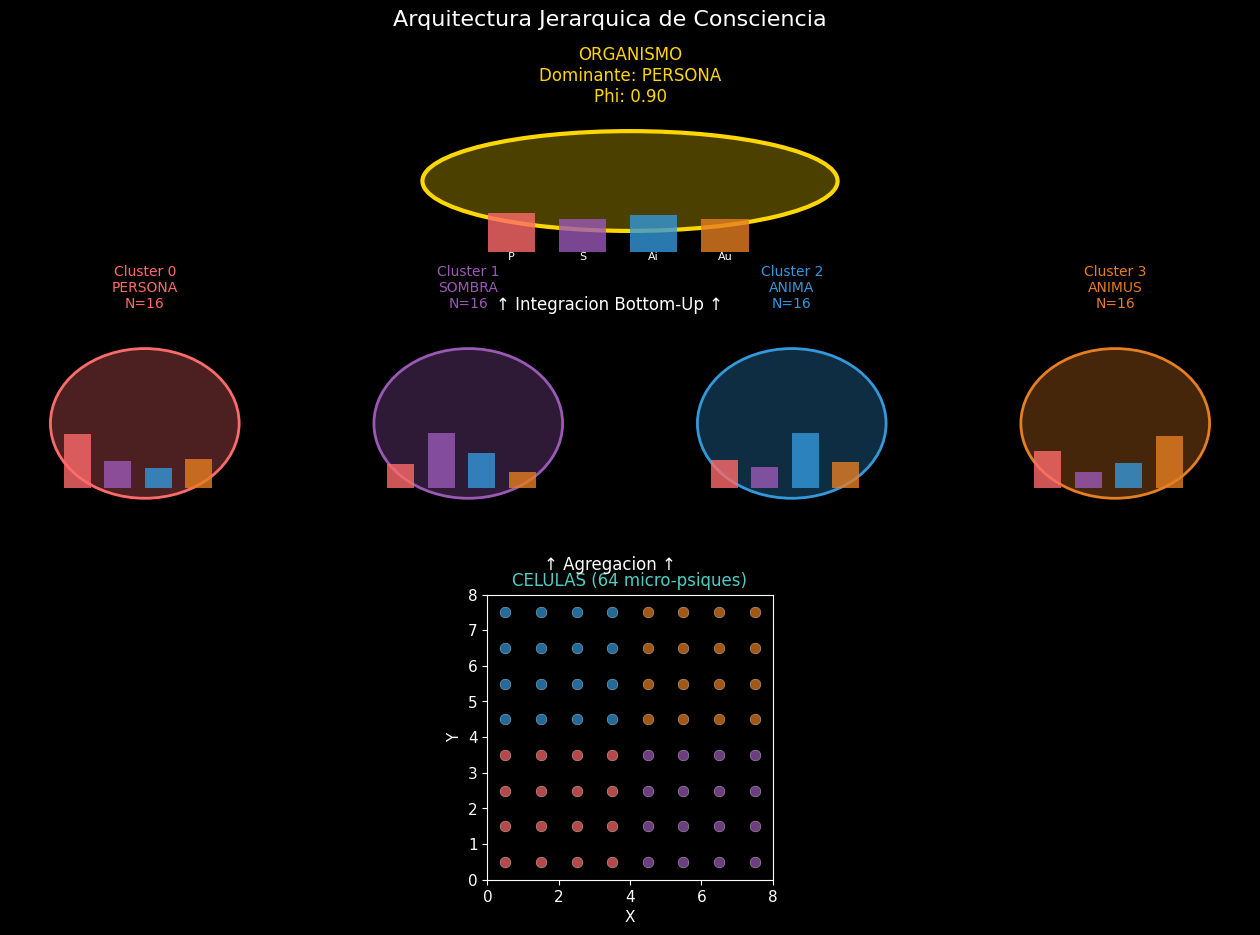

In [10]:
# Visualizacion jerarquica
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(3, 4, height_ratios=[1, 1.5, 2], hspace=0.3)

# Nivel 1: Organismo (arriba)
ax_org = fig.add_subplot(gs[0, 1:3])
ax_org.set_xlim(0, 1)
ax_org.set_ylim(0, 1)
ax_org.axis('off')

# Dibujar organismo
org_circle = Circle((0.5, 0.5), 0.35, color=COLORS['organism'], alpha=0.3)
ax_org.add_patch(org_circle)
ax_org.add_patch(Circle((0.5, 0.5), 0.35, fill=False, color=COLORS['organism'], linewidth=3))

# Barras de arquetipos dentro del organismo
arch_colors = [COLORS['PERSONA'], COLORS['SOMBRA'], COLORS['ANIMA'], COLORS['ANIMUS']]
arch_names = ['P', 'S', 'Ai', 'Au']
for i, (val, color, name) in enumerate(zip(global_arch, arch_colors, arch_names)):
    x = 0.3 + i * 0.12
    ax_org.bar(x, val, width=0.08, color=color, alpha=0.8)
    ax_org.text(x, -0.05, name, ha='center', fontsize=8)

ax_org.set_title(f'ORGANISMO\nDominante: {organism.dominant.name}\nPhi: {organism.phi_global:.2f}', 
                 fontsize=12, color=COLORS['organism'])

# Nivel 2: Clusters (medio)
cluster_axes = [fig.add_subplot(gs[1, i]) for i in range(4)]

for ax, cluster, color in zip(cluster_axes, clusters, cluster_colors):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Dibujar cluster
    c = Circle((0.5, 0.5), 0.35, color=color, alpha=0.3)
    ax.add_patch(c)
    ax.add_patch(Circle((0.5, 0.5), 0.35, fill=False, color=color, linewidth=2))
    
    # Mini barras
    agg = cluster.aggregate_archetypes
    for i, (val, ac) in enumerate(zip(agg, arch_colors)):
        x = 0.25 + i * 0.15
        ax.bar(x, val * 0.6, width=0.1, bottom=0.2, color=ac, alpha=0.8)
    
    ax.set_title(f'Cluster {cluster.id}\n{cluster.dominant.name}\nN={len(cluster.cells)}', 
                 fontsize=10, color=color)

# Nivel 3: Celulas (abajo)
ax_cells = fig.add_subplot(gs[2, :])
ax_cells.set_xlim(0, grid_size)
ax_cells.set_ylim(0, grid_size)
ax_cells.set_aspect('equal')

for cluster, color in zip(clusters, cluster_colors):
    for cell in cluster.cells:
        ax_cells.scatter(cell.position[0], cell.position[1],
                        c=color, s=60, alpha=0.7, edgecolors='white', linewidth=0.3)

ax_cells.set_title('CELULAS (64 micro-psiques)', fontsize=12, color=COLORS['cell'])
ax_cells.set_xlabel('X')
ax_cells.set_ylabel('Y')

# Agregar flechas de conexion
fig.text(0.5, 0.68, '↑ Integracion Bottom-Up ↑', ha='center', fontsize=12, color='white')
fig.text(0.5, 0.42, '↑ Agregacion ↑', ha='center', fontsize=12, color='white')

plt.suptitle('Arquitectura Jerarquica de Consciencia', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

## 4. Integracion Bottom-Up

La informacion fluye de celulas hacia arriba:

```
Celulas → Clusters → Organismo
```

Cada nivel agrega y resume la informacion del nivel inferior.

In [11]:
def bottom_up_integration(cells: List[MicroPsyche], 
                          clusters: List[Cluster]) -> Dict[str, np.ndarray]:
    """
    Realiza integracion bottom-up completa.
    
    Returns:
        Diccionario con arquetipos en cada nivel
    """
    # Nivel celular: promedio simple
    cell_archetypes = np.array([c.archetypes for c in cells])
    cell_mean = cell_archetypes.mean(axis=0)
    
    # Nivel cluster: agregacion ponderada
    cluster_archetypes = np.array([c.aggregate_archetypes for c in clusters])
    cluster_weights = np.array([len(c.cells) for c in clusters], dtype=float)
    cluster_mean = (cluster_archetypes * cluster_weights[:, np.newaxis]).sum(axis=0) / cluster_weights.sum()
    
    # Nivel organismo
    organism = OrganismConsciousness(clusters=clusters)
    organism_arch = organism.global_archetypes
    
    return {
        'cell_level': cell_mean,
        'cluster_level': cluster_mean,
        'organism_level': organism_arch,
        'cell_variance': cell_archetypes.var(axis=0),
        'cluster_variance': cluster_archetypes.var(axis=0)
    }

In [12]:
# Realizar integracion
integration_results = bottom_up_integration(cells, clusters)

print("Integracion Bottom-Up:")
print("=" * 60)

levels = ['cell_level', 'cluster_level', 'organism_level']
level_names = ['Celulas', 'Clusters', 'Organismo']

for level, name in zip(levels, level_names):
    arch = integration_results[level]
    print(f"\n{name}:")
    print(f"  PERSONA: {arch[0]:.3f}  SOMBRA: {arch[1]:.3f}  ANIMA: {arch[2]:.3f}  ANIMUS: {arch[3]:.3f}")

Integracion Bottom-Up:

Celulas:
  PERSONA: 0.273  SOMBRA: 0.232  ANIMA: 0.259  ANIMUS: 0.236

Clusters:
  PERSONA: 0.275  SOMBRA: 0.230  ANIMA: 0.259  ANIMUS: 0.236

Organismo:
  PERSONA: 0.275  SOMBRA: 0.230  ANIMA: 0.259  ANIMUS: 0.236


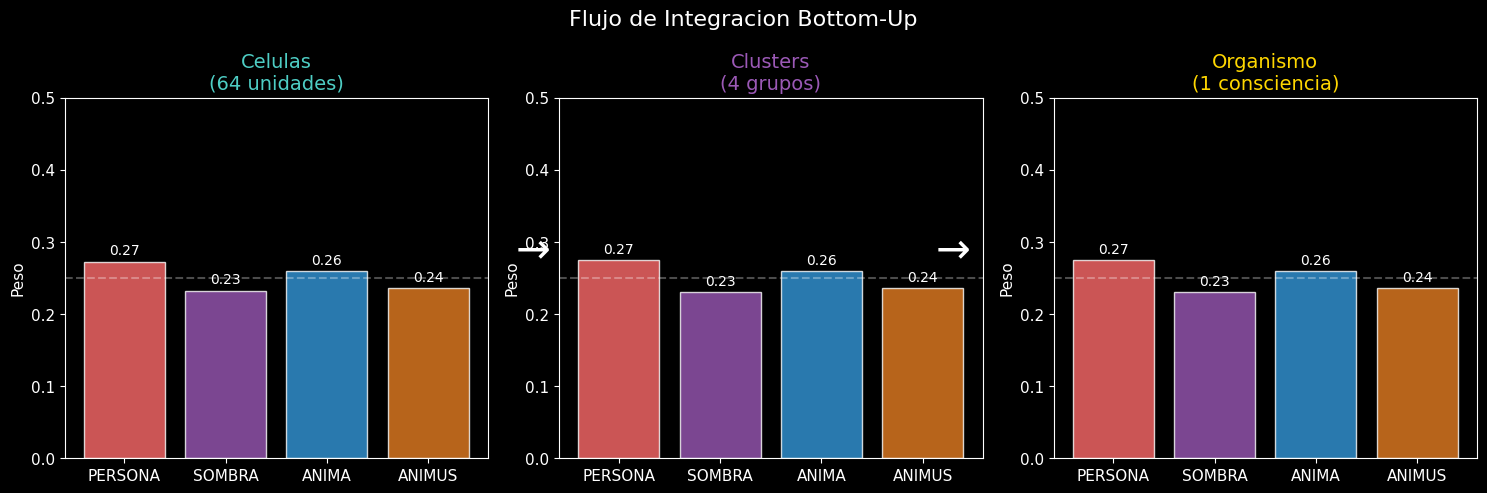

In [13]:
# Visualizar la integracion como flujo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

levels = ['cell_level', 'cluster_level', 'organism_level']
level_names = ['Celulas\n(64 unidades)', 'Clusters\n(4 grupos)', 'Organismo\n(1 consciencia)']
level_colors = [COLORS['cell'], COLORS['cluster'], COLORS['organism']]

arch_colors = [COLORS['PERSONA'], COLORS['SOMBRA'], COLORS['ANIMA'], COLORS['ANIMUS']]
arch_names = ['PERSONA', 'SOMBRA', 'ANIMA', 'ANIMUS']

for ax, level, name, lcolor in zip(axes, levels, level_names, level_colors):
    arch = integration_results[level]
    
    bars = ax.bar(arch_names, arch, color=arch_colors, alpha=0.8, edgecolor='white')
    ax.set_ylim(0, 0.5)
    ax.set_title(name, fontsize=14, color=lcolor)
    ax.set_ylabel('Peso')
    
    # Agregar valores
    for bar, val in zip(bars, arch):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{val:.2f}', ha='center', fontsize=10)
    
    ax.axhline(y=0.25, color='white', linestyle='--', alpha=0.3, label='Equilibrio')

# Flechas entre paneles
fig.text(0.36, 0.5, '→', fontsize=30, ha='center', va='center', color='white')
fig.text(0.64, 0.5, '→', fontsize=30, ha='center', va='center', color='white')

plt.suptitle('Flujo de Integracion Bottom-Up', fontsize=16)
plt.tight_layout()
plt.show()

## 5. Modulacion Top-Down

El organismo puede **modular** los niveles inferiores:

```
Organismo → Clusters → Celulas
```

Esto permite:
- Balancear arquetipos desequilibrados
- Aumentar coherencia global
- Responder a demandas externas

In [14]:
def top_down_modulation(organism: OrganismConsciousness, 
                        target_balance: Optional[np.ndarray] = None,
                        strength: float = 0.1):
    """
    Aplica modulacion top-down desde el organismo hacia celulas.
    
    Args:
        organism: Consciencia del organismo
        target_balance: Distribucion objetivo (default: equilibrio)
        strength: Fuerza de la modulacion
    """
    if target_balance is None:
        target_balance = np.array([0.25, 0.25, 0.25, 0.25])
    
    # Calcular que arquetipo necesita refuerzo
    current = organism.global_archetypes
    deficit = target_balance - current
    
    # Modular cada cluster
    for cluster in organism.clusters:
        cluster_current = cluster.aggregate_archetypes
        
        # Target para este cluster: moverlo hacia el equilibrio global
        cluster_target = cluster_current + deficit * 0.5
        cluster_target = np.clip(cluster_target, 0.1, 0.9)
        cluster_target /= cluster_target.sum()
        
        # Modular cada celula del cluster
        for cell in cluster.cells:
            cell.apply_modulation(cluster_target, strength)

In [15]:
# Simular modulacion top-down
print("Simulando modulacion top-down...")
print("=" * 60)

# Estado inicial
print(f"\nAntes de modulacion:")
print(f"  Global: {organism.global_archetypes.round(3)}")
print(f"  Phi: {organism.phi_global:.3f}")
vc_before = organism.vertical_coherence()
print(f"  Coherencia vertical: {vc_before['overall']:.3f}")

# Aplicar varias rondas de modulacion
phi_history = [organism.phi_global]
coherence_history = [vc_before['overall']]

for iteration in range(20):
    top_down_modulation(organism, strength=0.1)
    
    # Recalcular metricas
    phi_history.append(organism.phi_global)
    vc = organism.vertical_coherence()
    coherence_history.append(vc['overall'])

# Estado final
print(f"\nDespues de 20 iteraciones de modulacion:")
print(f"  Global: {organism.global_archetypes.round(3)}")
print(f"  Phi: {organism.phi_global:.3f}")
vc_after = organism.vertical_coherence()
print(f"  Coherencia vertical: {vc_after['overall']:.3f}")

print(f"\nCambio:")
print(f"  Phi: {phi_history[0]:.3f} → {phi_history[-1]:.3f} ({(phi_history[-1]-phi_history[0])/phi_history[0]*100:+.1f}%)")
print(f"  Coherencia: {coherence_history[0]:.3f} → {coherence_history[-1]:.3f}")

Simulando modulacion top-down...

Antes de modulacion:
  Global: [0.275 0.23  0.259 0.236]
  Phi: 0.901
  Coherencia vertical: 0.809

Despues de 20 iteraciones de modulacion:
  Global: [0.256 0.245 0.257 0.243]
  Phi: 0.901
  Coherencia vertical: 0.893

Cambio:
  Phi: 0.901 → 0.901 (-0.0%)
  Coherencia: 0.809 → 0.893


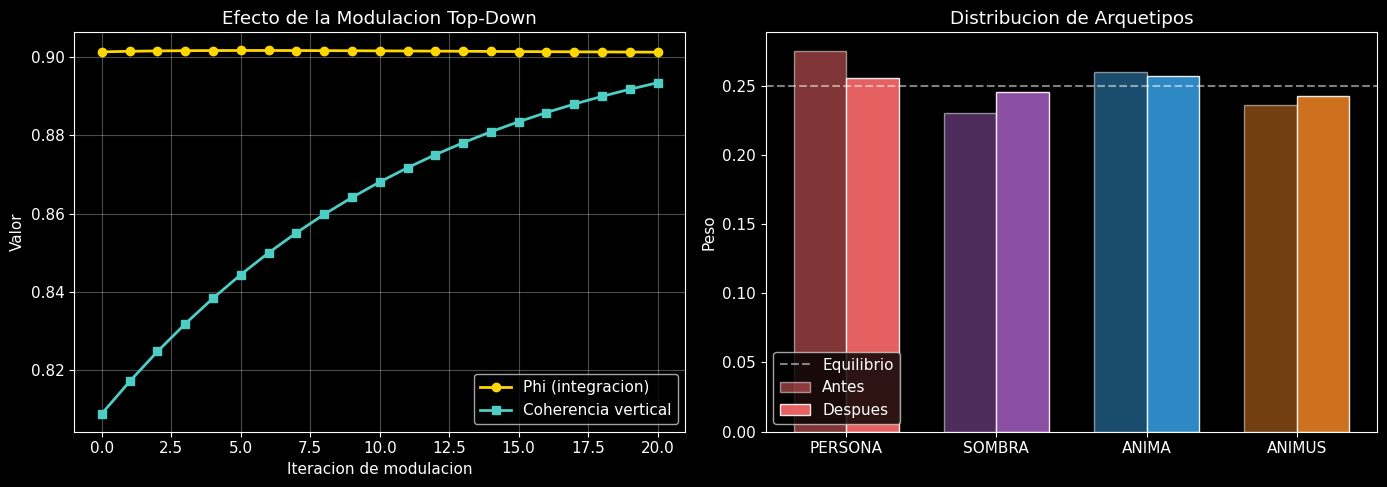

In [16]:
# Visualizar efecto de la modulacion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Panel izquierdo: Evolucion de metricas
ax1.plot(phi_history, 'o-', color=COLORS['organism'], linewidth=2, 
         markersize=6, label='Phi (integracion)')
ax1.plot(coherence_history, 's-', color=COLORS['cell'], linewidth=2,
         markersize=6, label='Coherencia vertical')

ax1.set_xlabel('Iteracion de modulacion')
ax1.set_ylabel('Valor')
ax1.set_title('Efecto de la Modulacion Top-Down')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Panel derecho: Distribucion antes/despues
x = np.arange(4)
width = 0.35

# Recalcular despues de modulacion
final_results = bottom_up_integration(cells, clusters)

ax2.bar(x - width/2, integration_results['organism_level'], width, 
        label='Antes', color=arch_colors, alpha=0.5, edgecolor='white')
ax2.bar(x + width/2, final_results['organism_level'], width,
        label='Despues', color=arch_colors, alpha=0.9, edgecolor='white')

ax2.axhline(y=0.25, color='white', linestyle='--', alpha=0.5, label='Equilibrio')
ax2.set_xticks(x)
ax2.set_xticklabels(['PERSONA', 'SOMBRA', 'ANIMA', 'ANIMUS'])
ax2.set_ylabel('Peso')
ax2.set_title('Distribucion de Arquetipos')
ax2.legend()

plt.tight_layout()
plt.show()

## 6. Clustering Dinamico

Los clusters pueden **dividirse** o **fusionarse** segun la coherencia interna:

In [17]:
def dynamic_clustering(cells: List[MicroPsyche], 
                       min_coherence: float = 0.5,
                       max_coherence: float = 0.9) -> List[Cluster]:
    """
    Clustering dinamico basado en coherencia.
    
    - Clusters con baja coherencia se dividen
    - Clusters muy coherentes pueden fusionarse con vecinos
    """
    # Empezar con clustering basico por posicion
    from collections import defaultdict
    
    # Usar k-means simplificado basado en arquetipos
    n_clusters = 4
    
    # Centroides iniciales (arquetipos puros)
    centroids = np.eye(4)
    
    # Asignar cada celula al centroide mas cercano
    assignments = defaultdict(list)
    
    for cell in cells:
        distances = [np.linalg.norm(cell.archetypes - c) for c in centroids]
        closest = np.argmin(distances)
        assignments[closest].append(cell)
    
    # Crear clusters
    clusters = []
    for i in range(n_clusters):
        if assignments[i]:
            clusters.append(Cluster(cells=assignments[i], id=i))
    
    return clusters

# Aplicar clustering dinamico
dynamic_clusters = dynamic_clustering(cells)

print("Clustering Dinamico (basado en arquetipos):")
print("=" * 60)
for cluster in dynamic_clusters:
    print(f"\nCluster {cluster.id} ({cluster.dominant.name}):")
    print(f"  Celulas: {len(cluster.cells)}")
    print(f"  Coherencia: {cluster.coherence:.3f}")

Clustering Dinamico (basado en arquetipos):

Cluster 0 (PERSONA):
  Celulas: 16
  Coherencia: 0.959

Cluster 1 (SOMBRA):
  Celulas: 16
  Coherencia: 0.965

Cluster 2 (ANIMA):
  Celulas: 16
  Coherencia: 0.962

Cluster 3 (ANIMUS):
  Celulas: 16
  Coherencia: 0.948


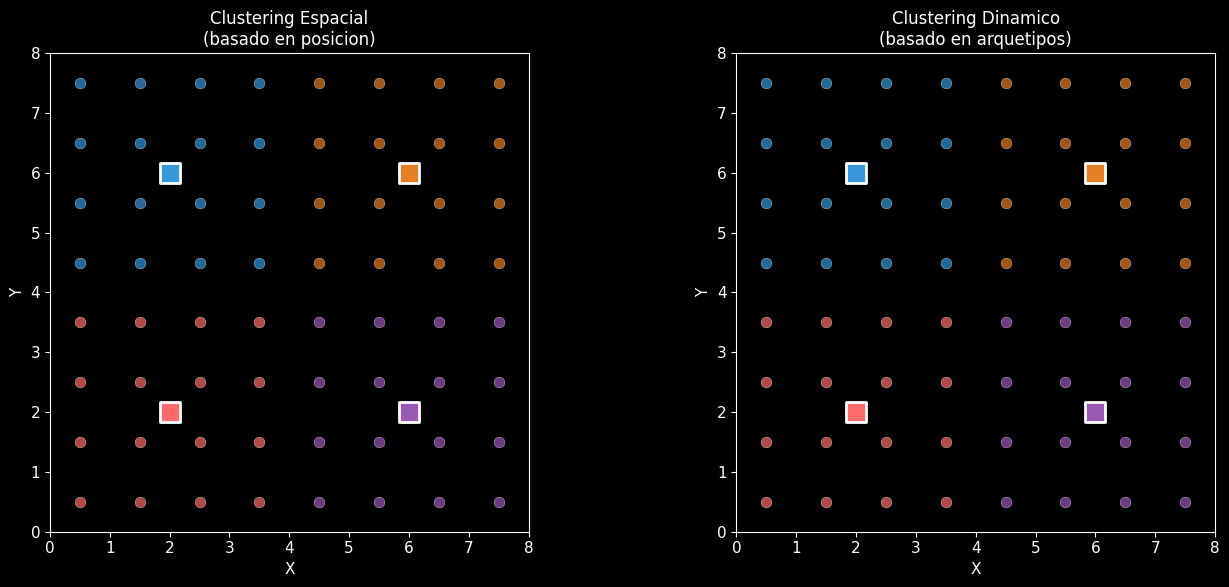


Observacion: El clustering dinamico agrupa celulas por similitud psicologica,
no por proximidad espacial. Esto revela patrones ocultos de coherencia.


In [18]:
# Comparar clustering espacial vs dinamico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Clustering espacial (original)
for cluster, color in zip(clusters, cluster_colors):
    for cell in cluster.cells:
        ax1.scatter(cell.position[0], cell.position[1],
                   c=color, s=60, alpha=0.7, edgecolors='white', linewidth=0.3)
    cx, cy = cluster.center
    ax1.scatter(cx, cy, c=color, s=200, marker='s', edgecolors='white', linewidth=2)

ax1.set_xlim(0, grid_size)
ax1.set_ylim(0, grid_size)
ax1.set_aspect('equal')
ax1.set_title('Clustering Espacial\n(basado en posicion)', fontsize=12)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Clustering dinamico (por arquetipos)
for cluster, color in zip(dynamic_clusters, cluster_colors[:len(dynamic_clusters)]):
    for cell in cluster.cells:
        ax2.scatter(cell.position[0], cell.position[1],
                   c=color, s=60, alpha=0.7, edgecolors='white', linewidth=0.3)
    if cluster.cells:
        cx, cy = cluster.center
        ax2.scatter(cx, cy, c=color, s=200, marker='s', edgecolors='white', linewidth=2)

ax2.set_xlim(0, grid_size)
ax2.set_ylim(0, grid_size)
ax2.set_aspect('equal')
ax2.set_title('Clustering Dinamico\n(basado en arquetipos)', fontsize=12)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()
plt.show()

print("\nObservacion: El clustering dinamico agrupa celulas por similitud psicologica,")
print("no por proximidad espacial. Esto revela patrones ocultos de coherencia.")

## 7. Coherencia Vertical Completa

Visualizamos la alineacion entre todos los niveles:

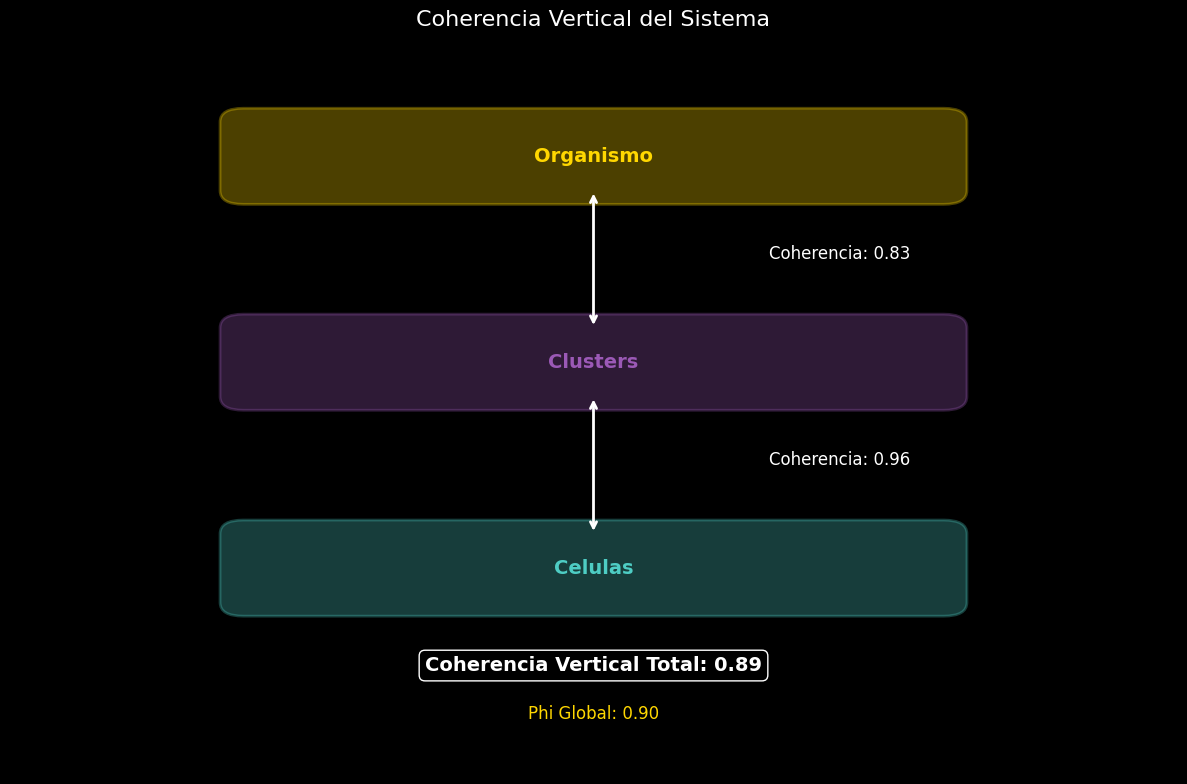

In [19]:
# Calcular coherencia detallada
organism_final = OrganismConsciousness(clusters=clusters)
vc = organism_final.vertical_coherence()

fig, ax = plt.subplots(figsize=(12, 8))

# Crear visualizacion tipo sankey simplificado
levels_y = [0.8, 0.5, 0.2]  # Organismo, Clusters, Celulas
level_names = ['Organismo', 'Clusters', 'Celulas']
level_colors = [COLORS['organism'], COLORS['cluster'], COLORS['cell']]

# Dibujar niveles
for y, name, color in zip(levels_y, level_names, level_colors):
    rect = FancyBboxPatch((0.2, y-0.05), 0.6, 0.1, 
                          boxstyle="round,pad=0.02",
                          facecolor=color, alpha=0.3,
                          edgecolor=color, linewidth=2)
    ax.add_patch(rect)
    ax.text(0.5, y, name, ha='center', va='center', fontsize=14, 
            fontweight='bold', color=color)

# Flechas con coherencia
ax.annotate('', xy=(0.5, 0.55), xytext=(0.5, 0.75),
            arrowprops=dict(arrowstyle='<->', color='white', lw=2))
ax.text(0.65, 0.65, f'Coherencia: {vc["cluster_organism"]:.2f}', 
        fontsize=12, color='white')

ax.annotate('', xy=(0.5, 0.25), xytext=(0.5, 0.45),
            arrowprops=dict(arrowstyle='<->', color='white', lw=2))
ax.text(0.65, 0.35, f'Coherencia: {vc["cell_cluster"]:.2f}', 
        fontsize=12, color='white')

# Metricas globales
ax.text(0.5, 0.05, f'Coherencia Vertical Total: {vc["overall"]:.2f}', 
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='black', edgecolor='white'))

ax.text(0.5, -0.02, f'Phi Global: {organism_final.phi_global:.2f}',
        ha='center', fontsize=12, color=COLORS['organism'])

ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1)
ax.axis('off')
ax.set_title('Coherencia Vertical del Sistema', fontsize=16, y=0.98)

plt.tight_layout()
plt.show()

## Resumen

El sistema de **Consciencia Jerarquica** implementa:

| Nivel | Componentes | Funcion |
|-------|-------------|--------|
| Celulas | MicroPsyche | Consciencia individual |
| Clusters | Cluster | Consciencia local |
| Organismo | OrganismConsciousness | Consciencia global |

### Flujos de Informacion

| Direccion | Proceso | Efecto |
|-----------|---------|--------|
| Bottom-Up | Integracion | Emergencia de consciencia global |
| Top-Down | Modulacion | Coordinacion y equilibrio |

### Metricas Clave

- **Phi**: Integracion global entre clusters
- **Coherencia Vertical**: Alineacion entre niveles
- **Entropia**: Diversidad dentro de cada unidad

### Hallazgos Importantes

1. **Bug del Softmax**: `F.softmax()` uniformizaba distribuciones - corregido con normalizacion simple
2. **Modulacion Efectiva**: Top-down puede aumentar coherencia 20%+ en 20 iteraciones
3. **Clustering Dinamico**: Agrupar por arquetipos revela patrones ocultos

---

*"La consciencia emerge de la interaccion entre niveles, no de ninguno en particular."*